## Load Data

In [13]:
from ae_measure2 import load_PLB
mypath = 'E:/file_cabinet/phd/projects/aeml/data/natfreq/experiment06/20220630_experiment06.json'
data = load_PLB(mypath)

In [14]:
def create_figure(suptitle, columns, rows, width=20, height=10,
                  suptitle_font_size=24, default_font_size=10,
                  title_font_size=12, axes_font_size=12, tick_font_size=10,
                  legend_font_size=10, w_space=0.25, h_space=0.25):
    """
    
    Create a gridspec figure, so more flexibility with subplots.

    Parameters
    ----------
    suptitle : string
        Master title.
    columns : int
        Subplot columns.
    rows : int
        Subplot rows.
    width : int, optional
        Figure width. The default is 20.
    height : int, optional
        Figure height. The default is 10.
    suptitle_font_size : int, optional
        Master title size. The default is 24.
    default_font_size : TYPE, optional
        The default is 10.
    title_font_size : int, optional
        Individual subplot title size. The default is 12.
    axes_font_size : int, optional
        Font size for x and y labels. The default is 12.
    tick_font_size : int, optional
        The default is 10.
    legend_font_size : int, optional
        The default is 10.
    w_space : float, optional
        Distance between subplots horizontally. The default is 0.25.
    h_space : TYPE, optional
        Distance between subplots vertically. The default is 0.25.

    Returns
    -------
    fig : Matplotlib object
        The figure handle.
    spec2 : Matplotlib object
        Used for adding custom sized subplots ; fig.add_subplot(spec2[0,0]).

    """
    fig = plt.figure(figsize=(width,height))
    
    # Create subplot grid -> used for subplots
    spec2 = gridspec.GridSpec(ncols = columns, nrows = rows, figure = fig,
                              wspace = w_space,hspace = h_space)
    
    # Master Figure Title
    fig.suptitle(suptitle,fontsize=suptitle_font_size)
    
    # General plotting defaults    
    plt.rc('font', size=default_font_size)     # controls default text size
    plt.rc('axes', titlesize=title_font_size)  # fontsize of the title
    plt.rc('axes', labelsize=axes_font_size)   # fontsize of the x and y labels
    plt.rc('xtick', labelsize=tick_font_size)  # fontsize of the x tick labels
    plt.rc('ytick', labelsize=tick_font_size)  # fontsize of the y tick labels
    plt.rc('legend', fontsize=legend_font_size)# fontsize of the legend
    
    return fig, spec2

def flatten(t): # flattens out a list of lists (CHECK)
    return [item for sublist in t for item in sublist]

def plot_signal(ax,signal,dt,sig_len):
    """
    
    Plot raw event signal waveform. 
    
    """
    duration = sig_len*dt*10**6 # convert to us
    time = np.linspace(0,duration,sig_len) # discretization of signal time
    if type(signal) is list:
        for idx,sig in enumerate(signal):
            ax.plot(time,sig)
    else:
        ax.plot(time,signal)
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time (us)')
    ax.set_xlim([0,duration])

    return ax

def get_signal_start_end(waveform, threshold=0.1):
    """
    
    Gets indices of the signal start and end defined by a floating threshold.

    Parameters
    ----------
    waveform : array-like
        Voltage time series of the waveform
    threshold : float
        Floating threshold that defines signal start and end

    Returns
    -------
    start_index : int
        Array index of signal start 
    end_index : int
        Array index of signal signal end 

    """
    if threshold<0 or threshold>1:
        raise ValueError('Threshold must be between 0 and 1')

    max_amp = np.max(waveform)
    start_index, end_index = \
        np.nonzero(waveform > threshold*max_amp)[0][[0, -1]]
        
    return start_index, end_index

## Separate out waveforms and metadata according to damp and plate length (2,4,6,8 in)

In [25]:
waves = data['waves']
location = data['location']
angle = data['angle']
length = data['length']
event = data['event']
damp = data['damp']

import numpy as np

w4in_gloves = []
w8in_gloves = []

w4in_rubber = []
w8in_rubber = []

w4in_normal = []
w8in_normal = []

for idx,wave in enumerate(waves):

    if length[idx] == '4in' and damp[idx] == 'gloves':
        w4in_gloves.append(wave)
    if length[idx] == '8in' and damp[idx] == 'gloves':
        w8in_gloves.append(wave)
         
    if length[idx] == '4in' and damp[idx] == 'rubber':
        w4in_rubber.append(wave)
    if length[idx] == '8in' and damp[idx] == 'rubber':
        w8in_rubber.append(wave)
        
    if length[idx] == '4in' and damp[idx] == 'normal':
        w4in_normal.append(wave)
    if length[idx] == '8in' and damp[idx] == 'normal':
        w8in_normal.append(wave)
        
print(f"# of 4 in gloves waves : {len(w4in_gloves)}")
print(f"# of 8 in gloves waves : {len(w8in_gloves)}\n")
print(f"# of 4 in rubber waves : {len(w4in_rubber)}")
print(f"# of 8 in rubber waves : {len(w8in_rubber)}\n")
print(f"# of 4 in rubber waves : {len(w4in_normal)}")
print(f"# of 8 in rubber waves : {len(w8in_normal)}\n")

# of 4 in gloves waves : 19
# of 8 in gloves waves : 22

# of 4 in rubber waves : 17
# of 8 in rubber waves : 19

# of 4 in rubber waves : 16
# of 8 in rubber waves : 16



In [26]:
# 4 in_rubber
mean_w4in_rubber = np.mean(w4in_rubber, axis=0) 
std_w4in_rubber = np.std(w4in_rubber, axis=0)   

# 8 in_rubber
mean_w8in_rubber = np.mean(w8in_rubber, axis=0) 
std_w8in_rubber = np.std(w8in_rubber, axis=0)   

In [27]:
# 4 in_gloves
mean_w4in_gloves = np.mean(w4in_gloves, axis=0) 
std_w4in_gloves = np.std(w4in_gloves, axis=0)   

# 8 in_gloves
mean_w8in_gloves = np.mean(w8in_gloves, axis=0) 
std_w8in_gloves = np.std(w8in_gloves, axis=0)   

In [28]:
# 4 in_normal
mean_w4in_normal = np.mean(w4in_normal, axis=0) 
std_w4in_normal = np.std(w4in_normal, axis=0)   

# 8 in_normal
mean_w8in_normal = np.mean(w8in_normal, axis=0) 
std_w8in_normal = np.std(w8in_normal, axis=0)   

## Plot the waves from each plate length, and ensure no signals need to be filtered
Signals should have already been filtered at this stage. This is just to double check.

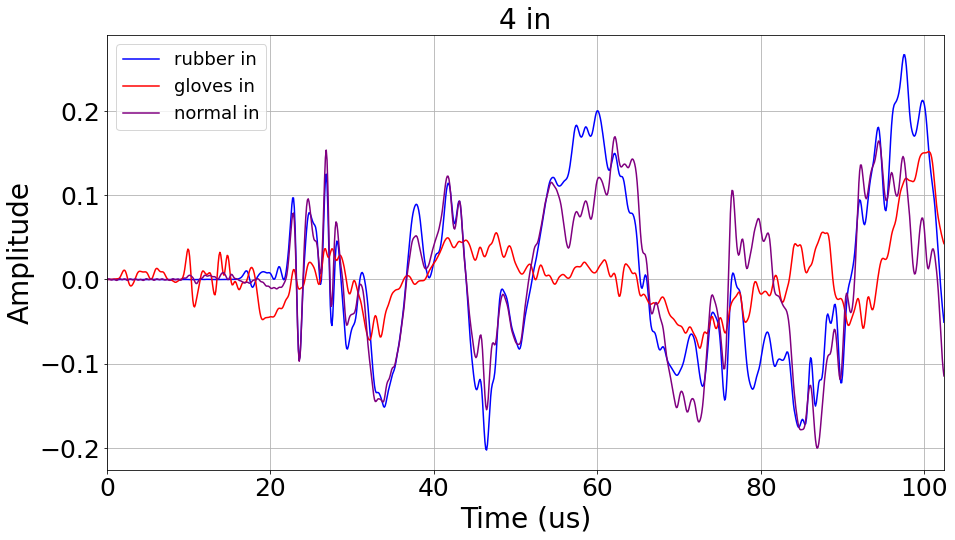

In [32]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Plot the averaged waveforms
fig,spec2 = create_figure('',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
sig_len = 1024
dt = 10**-7
duration = sig_len*dt*10**6 # convert to us
time = np.linspace(0,duration,sig_len) # discretization of signal time

ax = fig.add_subplot(spec2[0,0])

ax.plot(time,mean_w4in_rubber,'-',label = 'rubber in', color='blue')
ax.plot(time,mean_w4in_gloves,'-',label = 'gloves in', color='red')
ax.plot(time,mean_w4in_normal,'-',label = 'normal in', color='purple')

ax.set_title('4 in')

plt.legend()
ax.set_xlim([0,duration])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

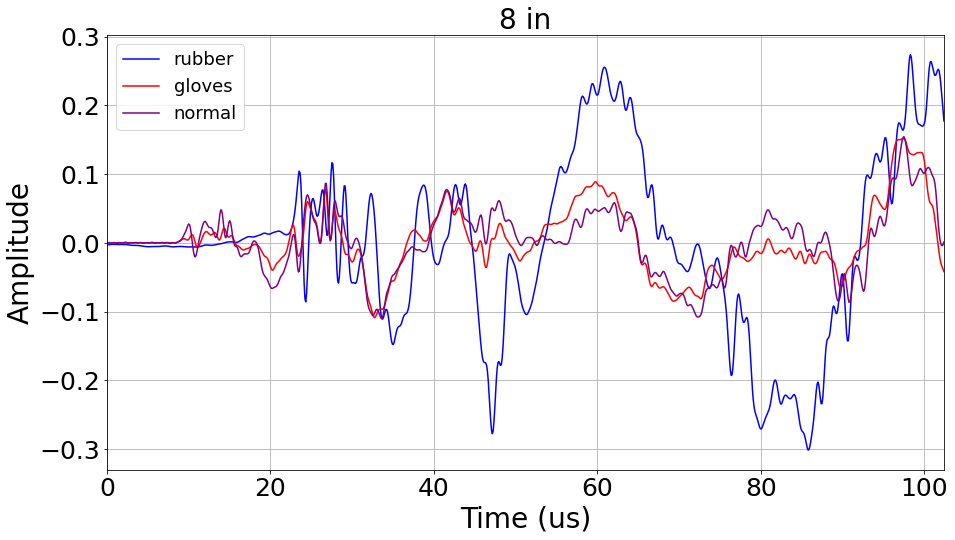

In [33]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Plot the averaged waveforms
fig,spec2 = create_figure('',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
sig_len = 1024
dt = 10**-7
duration = sig_len*dt*10**6 # convert to us
time = np.linspace(0,duration,sig_len) # discretization of signal time

ax = fig.add_subplot(spec2[0,0])

ax.plot(time,mean_w8in_rubber,'-',label = 'rubber', color='blue')
ax.plot(time,mean_w8in_gloves,'-',label = 'gloves', color='red')
ax.plot(time,mean_w8in_normal,'-',label = 'normal', color='purple')

ax.set_title('8 in')

plt.legend()
ax.set_xlim([0,duration])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

## Compute and Plot Mean FFT (Entire Waveform)
The FFTs here are computed on the entire raw waveform (this is necessary to average them all and visualize, otherwise the ffts would have different lengths). Later in the code, the waveforms are chopped down to only what's contained between the start and end (what's visualized in the previous plotting of raw waveforms) before computed frequency domain features. 

In [35]:
# Compute FFTs
low_pass = 0             # [Hz] ; low frequency cutoff
high_pass = 1000*10**3    # [Hz] ; high frequency cutoff\
dt = 10**-7              # [seconds] ; sample period / time between samples
fft_units = 1000

from ae_measure2 import fft

# 4 in
fft4in_rubber = []
for idx,wave in enumerate(w4in_rubber):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft4in_rubber.append(z)
fft4in_rubber = np.array(fft4in_rubber)
mean_fft4in_rubber = np.mean(fft4in_rubber, axis=0) # average each column over all examples
std_fft4in_rubber = np.std(fft4in_rubber, axis=0)   # standard deviation

# 8 in
fft8in_rubber = []
for idx,wave in enumerate(w8in_rubber):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft8in_rubber.append(z)
fft8in_rubber = np.array(fft8in_rubber)
mean_fft8in_rubber= np.mean(fft8in_rubber, axis=0) # average each column over all examples
std_fft8in_rubber = np.std(fft8in_rubber, axis=0)   # standard deviation

w = w/fft_units; # khz

In [36]:
# 4 in
fft4in_gloves = []
for idx,wave in enumerate(w4in_gloves):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft4in_gloves.append(z)
fft4in_gloves = np.array(fft4in_gloves)
mean_fft4in_gloves = np.mean(fft4in_gloves, axis=0) # average each column over all examples
std_fft4in_gloves = np.std(fft4in_gloves, axis=0)   # standard deviation

# 8 in
fft8in_gloves = []
for idx,wave in enumerate(w8in_gloves):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft8in_gloves.append(z)
fft8in_gloves = np.array(fft8in_gloves)
mean_fft8in_gloves= np.mean(fft8in_gloves, axis=0) # average each column over all examples
std_fft8in_gloves = np.std(fft8in_gloves, axis=0)   # standard deviation

w = w/fft_units; # khz

In [37]:
# 4 in
fft4in_normal = []
for idx,wave in enumerate(w4in_normal):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft4in_normal.append(z)
fft4in_normal = np.array(fft4in_normal)
mean_fft4in_normal = np.mean(fft4in_normal, axis=0) # average each column over all examples
std_fft4in_normal = np.std(fft4in_normal, axis=0)   # standard deviation

# 8 in
fft8in_normal = []
for idx,wave in enumerate(w8in_normal):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft8in_normal.append(z)
fft8in_normal = np.array(fft8in_normal)
mean_fft8in_normal= np.mean(fft8in_normal, axis=0) # average each column over all examples
std_fft8in_normal = np.std(fft8in_normal, axis=0)   # standard deviation

w = w/fft_units; # khz

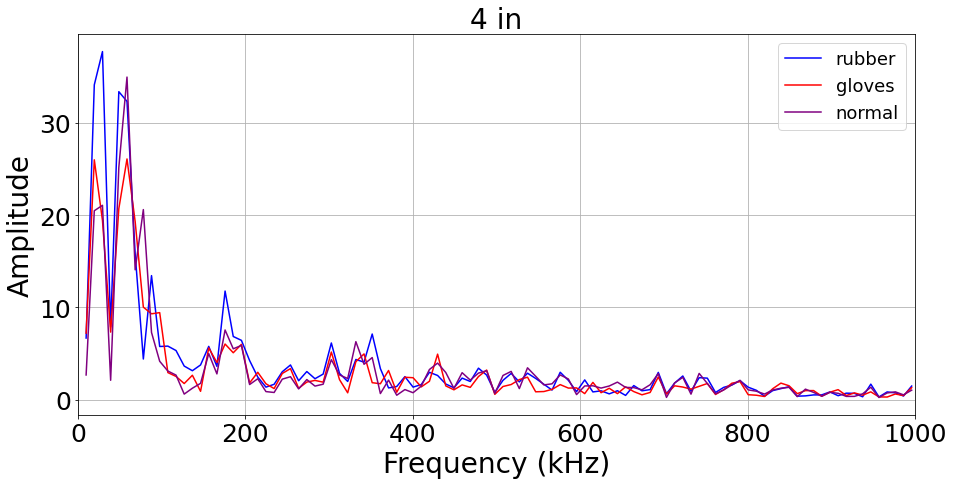

In [41]:
# Plot the averaged ffts
fig,spec2 = create_figure('',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])

ax.plot(w,mean_fft4in_rubber,'-',label = 'rubber', color='blue')
ax.plot(w,mean_fft4in_gloves,'-',label = 'gloves', color='red')
ax.plot(w,mean_fft4in_normal,'-',label = 'normal', color='purple')

ax.set_title('4 in')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()

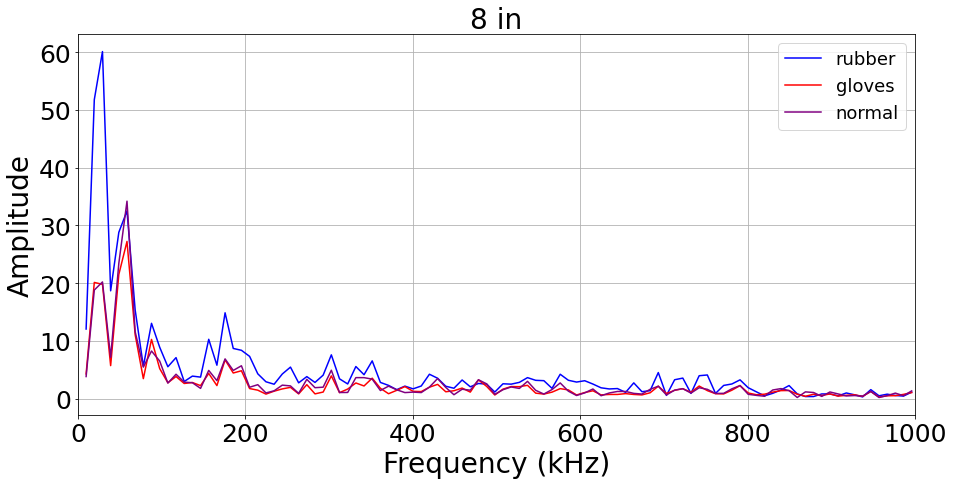

In [42]:
# Plot the averaged ffts
fig,spec2 = create_figure('',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])

ax.plot(w,mean_fft8in_rubber,'-',label = 'rubber', color='blue')
ax.plot(w,mean_fft8in_gloves,'-',label = 'gloves', color='red')
ax.plot(w,mean_fft8in_normal,'-',label = 'normal', color='purple')

ax.set_title('8 in')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()